## Problem 4

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import binom
from scipy.stats import beta
import seaborn as sns
import matplotlib.pyplot as plt
fname = 'ArtHistBooks.csv'

In [3]:
df = pd.read_csv(fname)

In [4]:
df

,ArtBooks,HistoryBooks,TableBooks,Purchase
0,0,0,1,0
1,0,1,0,0
2,0,0,0,0
3,1,0,1,0
4,1,1,1,0
...,...,...,...,...
995,1,1,0,1
996,0,1,0,0
997,1,0,1,0
998,1,1,0,0


In [5]:
df.ArtBooks

0      0
1      0
2      0
3      1
4      1
      ..
995    1
996    0
997    1
998    1
999    0
Name: ArtBooks, Length: 1000, dtype: int64

In [6]:
def posterior_from_conjugate_prior(**kwargs):
    if kwargs['Likelihood_Dist_Type'] == 'Binomial':
        # Get the parameters for the likelihood and prior distribution from the key word arguments.
        x = kwargs['x'] # possible values for p, range across [0, 1]
        n = kwargs['n'] # number of trials (number of customers)
        k = kwargs['k'] # number of successes (purchases)
        a = kwargs['a'] # alpha parameters on the prior
        b = kwargs['b'] # beta parameter on the prior
        
        print(f'a_prime = {k + a}.')
        print(f'b_prime = {n - k + b}.')
        Likelihood = binom.pmf(p=x, n=n, k=k)
        Prior = beta.pdf(x=x, a=a, b=b)
        Posterior = beta.pdf(x=x, a=k+a, b=n-k+b)
        
        return [Prior, Likelihood, Posterior]
                    
    else:
        print('Distribution type not supported.')    

## Prior: Artbooks

a_prime = 302.
b_prime = 700.


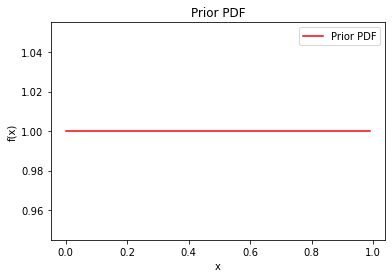

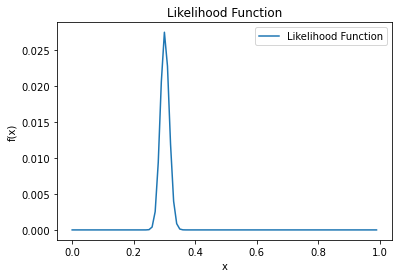

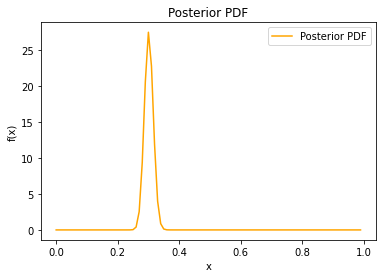

In [7]:
import numpy as np
x = np.arange(0, 1, 0.01)
num_trials= len(df.ArtBooks) #num_trials = 1000
num_successes = np.sum(df.ArtBooks > 0)

Prior, Likelihood, Posterior = posterior_from_conjugate_prior(
    Likelihood_Dist_Type='Binomial', 
    x=x, 
    n=num_trials, 
    k=num_successes, 
    a=1, 
    b=1)    

ax1 = sns.lineplot(x, Prior, color='red')
ax1.set(xlabel='x', ylabel='f(x)', title=f'Prior PDF');
plt.legend(labels=['Prior PDF']);
plt.show()

ax2 = sns.lineplot(x, Likelihood)
ax2.set(xlabel='x', ylabel='f(x)', title=f'Likelihood Function');
plt.legend(labels=['Likelihood Function']);
plt.show()

ax3 = sns.lineplot(x, Posterior, color='orange')
ax3.set(xlabel='x', ylabel='f(x)', title=f'Posterior PDF');
plt.legend(labels=['Posterior PDF']);
plt.show()

## Prior: HistoryBooks

a_prime = 544.
b_prime = 458.


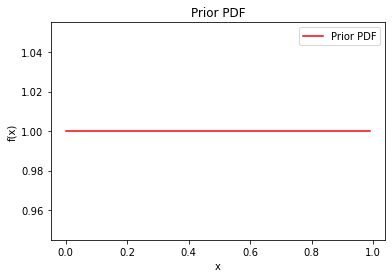

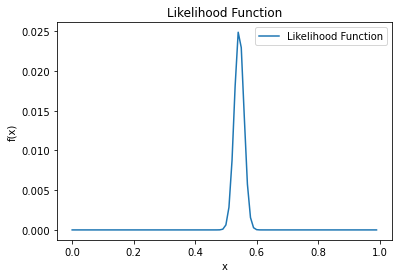

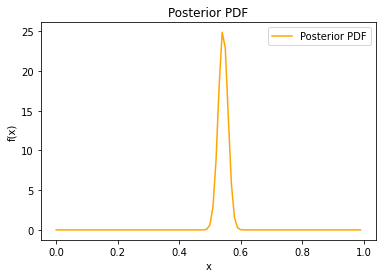

In [8]:
import numpy as np
x = np.arange(0, 1, 0.01)
num_trials= len(df.HistoryBooks) #num_trials = 1000
num_successes = np.sum(df.HistoryBooks > 0)

Prior, Likelihood, Posterior = posterior_from_conjugate_prior(
    Likelihood_Dist_Type='Binomial', 
    x=x, 
    n=num_trials, 
    k=num_successes, 
    a=1, 
    b=1)    

ax1 = sns.lineplot(x, Prior, color='red')
ax1.set(xlabel='x', ylabel='f(x)', title=f'Prior PDF');
plt.legend(labels=['Prior PDF']);
plt.show()

ax2 = sns.lineplot(x, Likelihood)
ax2.set(xlabel='x', ylabel='f(x)', title=f'Likelihood Function');
plt.legend(labels=['Likelihood Function']);
plt.show()

ax3 = sns.lineplot(x, Posterior, color='orange')
ax3.set(xlabel='x', ylabel='f(x)', title=f'Posterior PDF');
plt.legend(labels=['Posterior PDF']);
plt.show()

## Prior: TableBooks

a_prime = 381.
b_prime = 621.


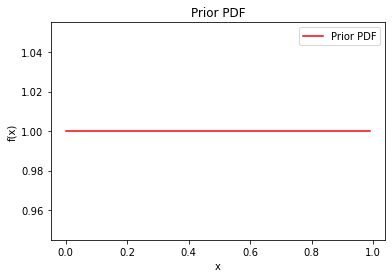

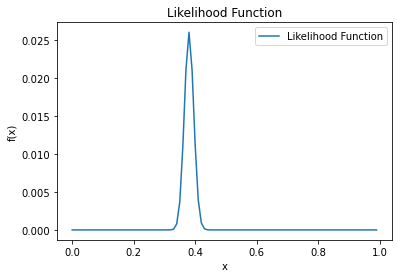

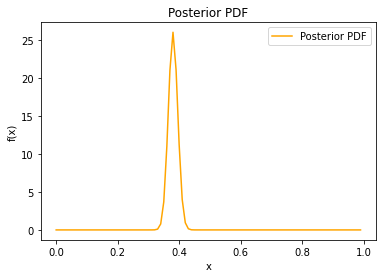

In [9]:
import numpy as np
x = np.arange(0, 1, 0.01)
num_trials= len(df.HistoryBooks) #num_trials = 1000
num_successes = np.sum(df.TableBooks > 0)

Prior, Likelihood, Posterior = posterior_from_conjugate_prior(
    Likelihood_Dist_Type='Binomial', 
    x=x, 
    n=num_trials, 
    k=num_successes, 
    a=1, 
    b=1)    

ax1 = sns.lineplot(x, Prior, color='red')
ax1.set(xlabel='x', ylabel='f(x)', title=f'Prior PDF');
plt.legend(labels=['Prior PDF']);
plt.show()

ax2 = sns.lineplot(x, Likelihood)
ax2.set(xlabel='x', ylabel='f(x)', title=f'Likelihood Function');
plt.legend(labels=['Likelihood Function']);
plt.show()

ax3 = sns.lineplot(x, Posterior, color='orange')
ax3.set(xlabel='x', ylabel='f(x)', title=f'Posterior PDF');
plt.legend(labels=['Posterior PDF']);
plt.show()

## Prior: Artboks and HistoryBooks

a_prime = 172.
b_prime = 830.


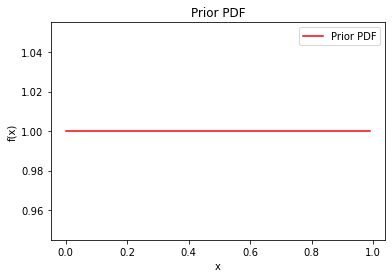

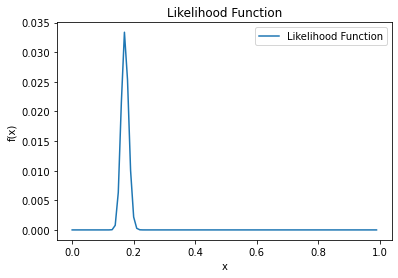

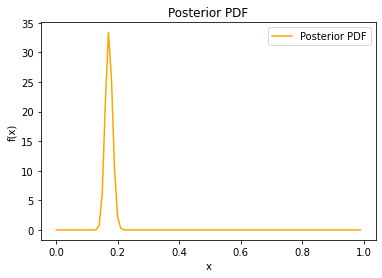

In [10]:
import numpy as np
x = np.arange(0, 1, 0.01)
num_trials= len(df.HistoryBooks) #num_trials = 1000
num_successes = np.sum((df.ArtBooks > 0) & (df.HistoryBooks))

Prior, Likelihood, Posterior = posterior_from_conjugate_prior(
    Likelihood_Dist_Type='Binomial', 
    x=x, 
    n=num_trials, 
    k=num_successes, 
    a=1, 
    b=1)    

ax1 = sns.lineplot(x, Prior, color='red')
ax1.set(xlabel='x', ylabel='f(x)', title=f'Prior PDF');
plt.legend(labels=['Prior PDF']);
plt.show()

ax2 = sns.lineplot(x, Likelihood)
ax2.set(xlabel='x', ylabel='f(x)', title=f'Likelihood Function');
plt.legend(labels=['Likelihood Function']);
plt.show()

ax3 = sns.lineplot(x, Posterior, color='orange')
ax3.set(xlabel='x', ylabel='f(x)', title=f'Posterior PDF');
plt.legend(labels=['Posterior PDF']);
plt.show()

## Prior: Artboks and TableBooks

a_prime = 126.
b_prime = 876.


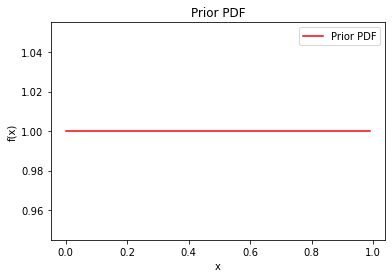

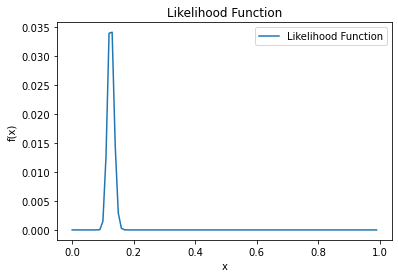

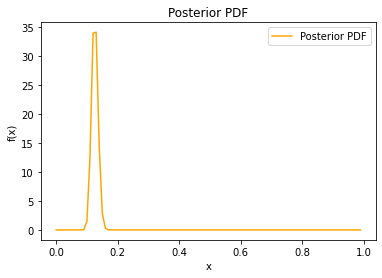

In [11]:
import numpy as np
x = np.arange(0, 1, 0.01)
num_trials= len(df.HistoryBooks) #num_trials = 1000
num_successes = np.sum((df.ArtBooks > 0) & (df.TableBooks))

Prior, Likelihood, Posterior = posterior_from_conjugate_prior(
    Likelihood_Dist_Type='Binomial', 
    x=x, 
    n=num_trials, 
    k=num_successes, 
    a=1, 
    b=1)    

ax1 = sns.lineplot(x, Prior, color='red')
ax1.set(xlabel='x', ylabel='f(x)', title=f'Prior PDF');
plt.legend(labels=['Prior PDF']);
plt.show()

ax2 = sns.lineplot(x, Likelihood)
ax2.set(xlabel='x', ylabel='f(x)', title=f'Likelihood Function');
plt.legend(labels=['Likelihood Function']);
plt.show()

ax3 = sns.lineplot(x, Posterior, color='orange')
ax3.set(xlabel='x', ylabel='f(x)', title=f'Posterior PDF');
plt.legend(labels=['Posterior PDF']);
plt.show()

## Prior: HistoryBooks and TablBooks

a_prime = 193.
b_prime = 809.


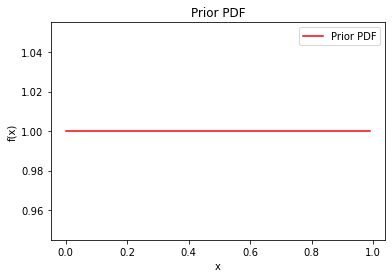

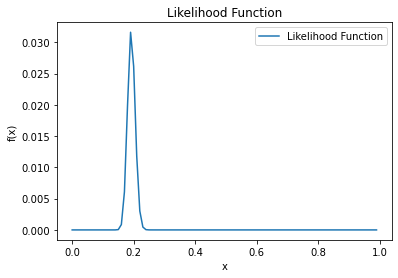

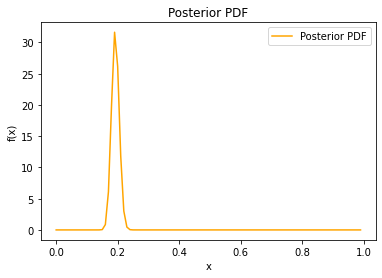

In [12]:
import numpy as np
x = np.arange(0, 1, 0.01)
num_trials= len(df.HistoryBooks) #num_trials = 1000
num_successes = np.sum((df.HistoryBooks > 0) & (df.TableBooks))

Prior, Likelihood, Posterior = posterior_from_conjugate_prior(
    Likelihood_Dist_Type='Binomial', 
    x=x, 
    n=num_trials, 
    k=num_successes, 
    a=1, 
    b=1)    

ax1 = sns.lineplot(x, Prior, color='red')
ax1.set(xlabel='x', ylabel='f(x)', title=f'Prior PDF');
plt.legend(labels=['Prior PDF']);
plt.show()

ax2 = sns.lineplot(x, Likelihood)
ax2.set(xlabel='x', ylabel='f(x)', title=f'Likelihood Function');
plt.legend(labels=['Likelihood Function']);
plt.show()

ax3 = sns.lineplot(x, Posterior, color='orange')
ax3.set(xlabel='x', ylabel='f(x)', title=f'Posterior PDF');
plt.legend(labels=['Posterior PDF']);
plt.show()

## Problem 5

In [13]:
import numpy as np 
import pandas as pd
chd_data = pd.read_csv("CHDdata.csv")
chd_data.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [14]:
#drop "famhist" column
chd_data = chd_data.drop(columns= "famhist")
#check that it worked
chd_data.head()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,60,25.99,57.34,49,1


In [15]:
for key in chd_data.keys()[0:8]:
    print("Standardizing "+key+".")
    chd_data[key] = chd_data[key] - np.mean(chd_data[key])
    chd_data[key] = chd_data[key] / np.std(chd_data[key])

Standardizing sbp.
Standardizing tobacco.
Standardizing ldl.
Standardizing adiposity.
Standardizing typea.
Standardizing obesity.
Standardizing alcohol.
Standardizing age.


In [16]:
# Check that it worked
chd_data.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,462.000000
mean,-2.571296e-16,5.022437e-16,-3.963040e-15,1.559599e-15,1.153478e-17,-5.286776e-15,-4.169344e-16,1.970526e-17,0.346320
std,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00,0.476313
min,-1.823123e+00,-7.924170e-01,-1.817753e+00,-2.401708e+00,-4.089354e+00,-2.695129e+00,-6.969825e-01,-1.906103e+00,0.000000
25%,-6.997535e-01,-7.809742e-01,-7.047170e-01,-7.245926e-01,-6.224081e-01,-7.267824e-01,-6.761275e-01,-8.096968e-01,0.000000
50%,-2.113321e-01,-3.565020e-01,-1.935182e-01,9.112757e-02,-1.059418e-02,-5.680824e-02,-3.898822e-01,1.496582e-01,0.000000
75%,4.724579e-01,4.063492e-01,5.074164e-01,7.489145e-01,7.031887e-01,5.828745e-01,2.800340e-01,8.349118e-01,1.000000
max,3.891408e+00,6.007857e+00,5.119082e+00,2.197976e+00,2.538631e+00,4.878906e+00,5.321938e+00,1.451640e+00,1.000000


In [17]:
chd_positive = chd_data[chd_data.chd == 1]
chd_negative = chd_data[chd_data.chd == 0]

In [18]:
# Check that it worked
chd_positive.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.0
mean,0.264268,0.411771,0.361398,0.349128,0.141722,0.137517,0.085909,0.512414,1.0
std,1.156458,1.212965,1.075607,0.908099,1.044840,1.043288,1.070602,0.729735,0.0
min,-1.774281,-0.792417,-1.542213,-2.060752,-3.375571,-2.695129,-0.696983,-1.769052,1.0
25%,-0.528806,-0.465481,-0.386879,-0.250150,-0.545931,-0.572356,-0.677559,-0.004524,1.0
50%,-0.015964,0.107747,0.156949,0.385765,0.193344,0.102370,-0.356351,0.697861,1.0
75%,0.985300,0.994834,0.890513,1.052558,0.805158,0.649991,0.308250,1.109013,1.0
max,3.891408,6.007857,4.553501,2.197976,2.538631,4.674587,5.321938,1.451640,1.0


In [19]:
# Lets check the mean of each class to get a first look at the seperation
print("Mean for CHD Positive:")
print(np.array([chd_positive.mean()[0:8]]))
print("Mean for CHD Negative:")
print(np.array([chd_negative.mean()[0:8]]))

Mean for CHD Positive:
[[0.26426823 0.41177089 0.36139839 0.34912802 0.14172199 0.13751694
  0.0859086  0.51241433]]
Mean for CHD Negative:
[[-0.14000966 -0.21815676 -0.19146935 -0.18496849 -0.0750845  -0.07285666
  -0.04551449 -0.27147779]]


In [20]:
chd_positive

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
0,1.058564,1.823073,0.478412,-0.295503,-0.418470,-0.176786,3.277738,0.629336,1
1,0.277089,-0.790237,-0.159680,0.412140,0.193344,0.671373,-0.612745,1.383115,1
3,1.546985,0.842264,0.807126,1.624141,-0.214532,1.412621,0.295062,1.040488,1
4,-0.211332,2.171805,-0.599577,0.305351,0.703189,-0.012856,1.647775,0.423760,1
7,-1.188175,0.096850,-0.072667,-1.390421,0.907127,-0.697085,-0.422187,1.040488,1
...,...,...,...,...,...,...,...,...,...
453,-0.699754,-0.443685,1.198683,1.836434,-1.744067,1.296207,-0.696983,0.560810,1
454,0.374774,-0.652924,0.038515,0.336230,0.703189,0.490812,-0.360440,-0.261494,1
455,-0.504385,-0.304192,-0.923457,0.138089,-0.520439,-0.495142,1.242125,-1.083798,1
458,2.133091,0.123004,-0.159680,0.861173,-0.112563,0.609602,0.068519,0.629336,1


In [21]:
chd_negative

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
2,-0.992806,-0.774980,-0.609245,0.884332,-0.112563,0.735519,-0.541183,0.218184,0
5,-0.309016,0.558919,0.836130,1.389975,0.907127,1.122774,-0.118767,0.149658,0
6,0.179405,0.090311,-0.657585,-1.184561,0.601220,-1.243518,-0.589845,-0.330019,0
8,-1.188175,-0.792417,-0.440054,-0.772841,-0.418470,-0.281321,-0.595161,-0.946748,0
12,-0.992806,-0.792417,-1.382690,-1.975835,0.601220,-1.062957,-0.696983,-1.769052,0
...,...,...,...,...,...,...,...,...,...
452,0.765511,0.412888,-0.744598,0.437873,0.805158,0.025157,1.052794,-0.055918,0
456,1.546985,-0.705234,-0.304701,2.142651,0.295313,1.676334,-0.612745,0.971963,0
457,3.696039,-0.705234,0.599263,0.812281,1.111065,0.571590,-0.696983,1.040488,0
459,-1.481228,-0.138545,-1.522877,-1.309364,-1.336191,-1.414575,0.392385,0.834912,0


In [69]:
### chd_negative
from scipy.stats import beta
from scipy.stats import norm
from math import sqrt
a = 9
b = 160*8
u_prior = 0
mean = np.array([chd_positive.mean()[0:8]])
u_post_p = (1*u_prior + b*mean)/(a+b)
var_post_p = sqrt(1/(a+b))

In [71]:
u_post_p

array([[0.26242306, 0.40889584, 0.35887505, 0.34669035, 0.14073247,
        0.13655677, 0.08530877, 0.50883657]])

In [72]:
var_post_p

0.027853100187767637

In [74]:
### chd_negative
a = 9
b = 302*8
u_prior = 0
mean = np.array([chd_negative.mean()[0:8]])
u_post_n = (1*u_prior + b*mean)/(a+b)
var_post_n = sqrt(1/(a+b))

In [75]:
u_post_n 

array([[-0.13949003, -0.21734711, -0.19075874, -0.18428201, -0.07480584,
        -0.07258626, -0.04534557, -0.27047024]])

In [76]:
var_post_n

0.02030692330267238

## Problem 7

In [94]:
from scipy.stats import beta
from scipy.stats import norm

def posterior_from_conjugate_prior(**kwargs):
    if kwargs['Likelihood_Dist_Type'] == 'Binomial':
        # Get the parameters for the likelihood and prior distribution from the key word arguments.
        x = kwargs['x']
        n = kwargs['n']
        k = kwargs['k']
        a = kwargs['a']
        b = kwargs['b']
        
        print(f'a_prime = {k + a}.')
        print(f'b_prime = {n - k + b}.')
        Likelihood = binom.pmf(p=x, n=n, k=k)
        Prior = beta.pdf(x=x, a=a, b=b)
        Posterior = beta.pdf(x=x, a=k+a, b=n-k+b)
        
        return [Prior, Likelihood, Posterior]
    
    elif kwargs['Likelihood_Dist_Type'] == 'Gaussian_Known_Variance':
        # Get the parameters for the likelihood and prior distribution from the key word arguments.
        x = kwargs['x']
        n= len(x)
        mu = kwargs['mu']
        var = kwargs['var']
        prior_mu = kwargs['prior_mu']
        prior_var = kwargs['prior_var']
        print(kwargs)

        
        # To answer the challenge question, modify this section with the correct formulas
        x_bar = np.mean(x)
        mu_prime = (prior_mu*var + n*x_bar*prior_var)/(var+n*prior_var)
        var_prime =(prior_var*var)/(var+n*prior_var)
        print(f'mu_prime = {mu_prime:.2f}.')
        print(f'var_prime = {var_prime: .2f}.')
        Likelihood = norm.pdf(x, loc = mu, scale=var**(.5))
        Prior = norm.pdf(x= x, loc = prior_mu, scale = prior_var**(.5))
        Posterior = norm.pdf(x= x, loc = mu_prime, scale = var_prime**(.50))
        
        return [Prior, Likelihood, Posterior]
    
    else:
        print('Distribution type not supported.') 
        return -1, -1, -1

In [95]:
import numpy as np
x = np.arange(-5, 80, 0.01)
Prior, Likelihood, Posterior = posterior_from_conjugate_prior(Likelihood_Dist_Type='Gaussian_Known_Variance', x=x, mu=50, var=21, prior_mu=0.5, prior_var=1)    

{'Likelihood_Dist_Type': 'Gaussian_Known_Variance', 'x': array([-5.  , -4.99, -4.98, ..., 79.97, 79.98, 79.99]), 'mu': 50, 'var': 21, 'prior_mu': 0.5, 'prior_var': 1}
mu_prime = 37.40.
var_prime =  0.00.


{'Likelihood_Dist_Type': 'Gaussian_Known_Variance', 'x': array([-5.  , -4.99, -4.98, ..., 79.97, 79.98, 79.99]), 'theta': 5, 'n': 100, 'k': 21, 'mu': 50, 'var': 21, 'prior_mu': 0.5, 'prior_var': 1}
mu_prime = 37.40.
var_prime =  0.00.


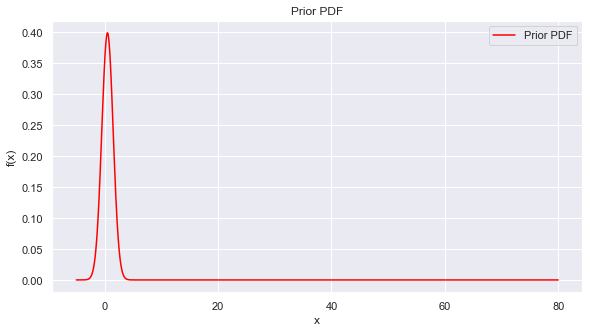

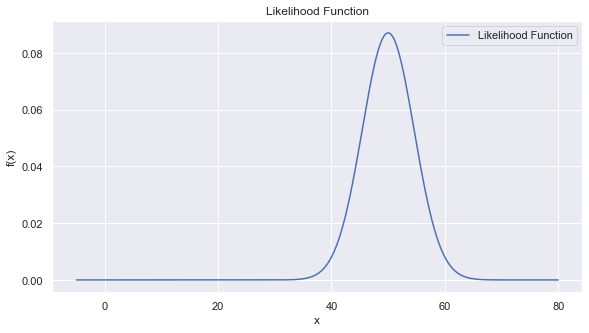

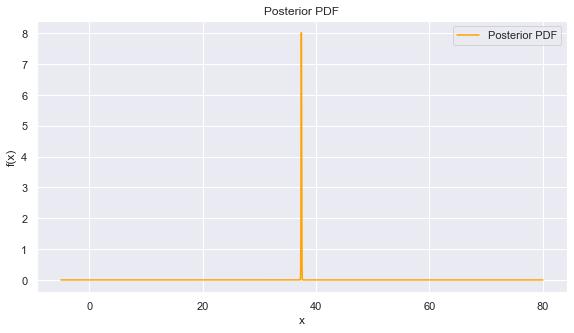

In [96]:
import numpy as np
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(9.5,5)})

x = np.arange(-5, 80, 0.01)
Prior, Likelihood, Posterior = posterior_from_conjugate_prior(Likelihood_Dist_Type='Gaussian_Known_Variance', x=x, theta= 5, n=100, k = 21, mu=50, var=21, prior_mu=0.5, prior_var=1)    

ax1 = sns.lineplot(x, Prior, color='red')
ax1.set(xlabel='x', ylabel='f(x)', title=f'Prior PDF');
plt.legend(labels=['Prior PDF']);
plt.show()

ax2 = sns.lineplot(x, Likelihood)
ax2.set(xlabel='x', ylabel='f(x)', title=f'Likelihood Function');
plt.legend(labels=['Likelihood Function']);
plt.show()

ax3 = sns.lineplot(x, Posterior, color='orange')
ax3.set(xlabel='x', ylabel='f(x)', title=f'Posterior PDF');
plt.legend(labels=['Posterior PDF']);
plt.show()